<a href="https://colab.research.google.com/github/anandaazharuddin/PCVK_GANJIL_24/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#accsesing google drive

In [1]:
#accsesing google drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


Change brightness of picture
----------------------------
Masukkan nilai kecerahan: 60


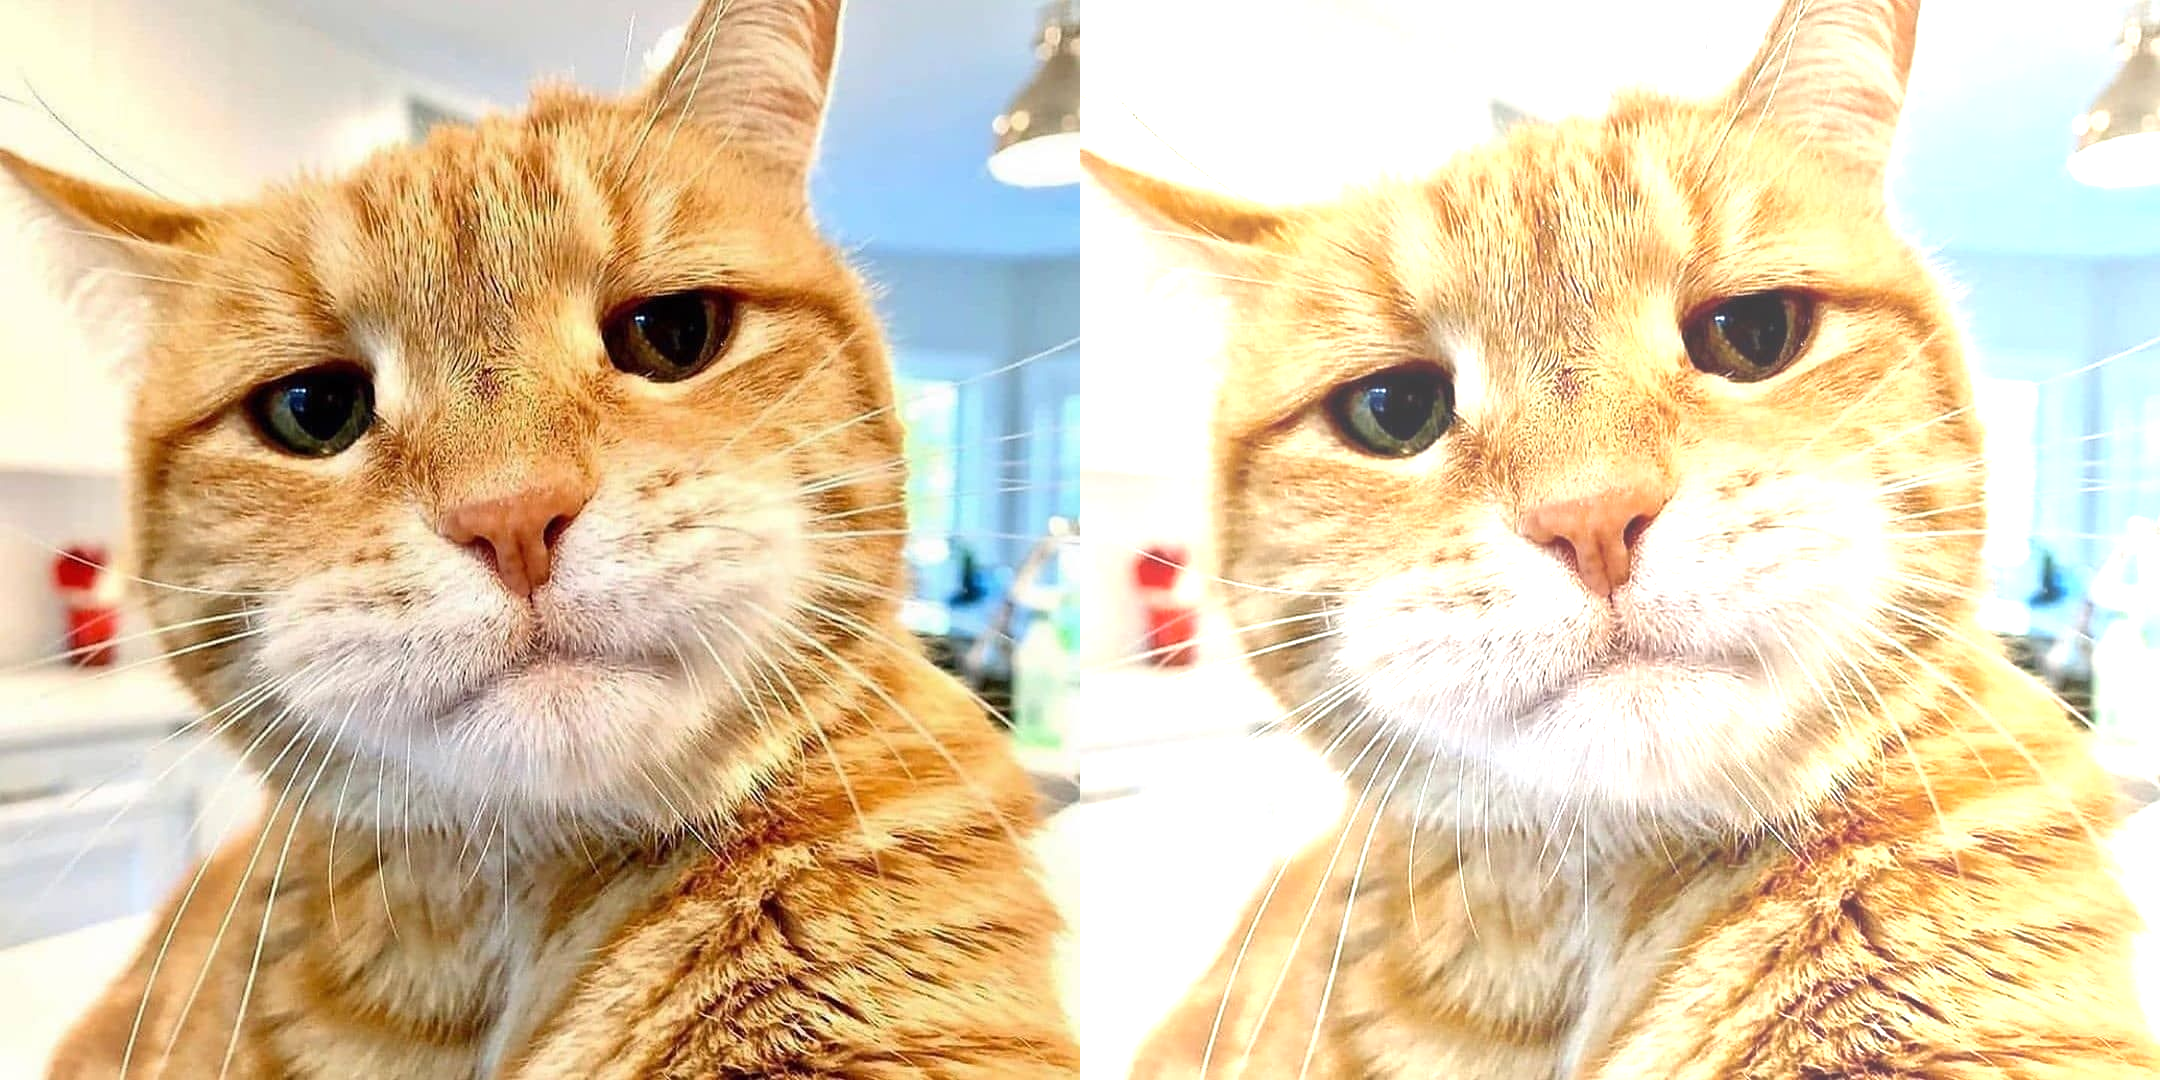

In [9]:
import cv2  # Import OpenCV
import numpy as np  # Import Numpy
from google.colab.patches import cv2_imshow  # Menggunakan cv2_imshow di Colab

print('Change brightness of picture')
print('----------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, input bukan angka')

# Load gambar
original = cv2.imread('/content/drive/MyDrive/kucing.jpg')
if original is None:
    print('Gambar tidak ditemukan, pastikan path benar!')
else:
    brightness_image = np.zeros(original.shape, original.dtype)

    # Mengakses setiap piksel dan mengubah kecerahan
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

    # Menggabungkan gambar asli dan gambar dengan kecerahan yang diubah
    final_frame = cv2.hconcat([original, brightness_image])

    # Tampilkan gambar di Colab menggunakan cv2_imshow
    cv2_imshow(final_frame)  # Menggunakan cv2_imshow untuk Colab


Citra Asli:


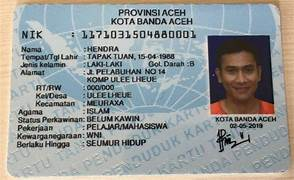

Citra Inverse:


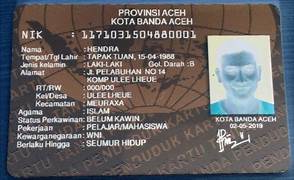

In [10]:
import cv2  # Import OpenCV
import numpy as np  # Import Numpy
from google.colab.patches import cv2_imshow  # Menggunakan cv2_imshow di Colab

# Load gambar dari drive atau path lokal
original = cv2.imread('/content/drive/MyDrive/ktp.jpeg')

if original is None:
    print('Gambar tidak ditemukan, pastikan path benar!')
else:
    # Terapkan formula inverse citra
    inverse_image = 255 - original

    # Tampilkan citra asli
    print("Citra Asli:")
    cv2_imshow(original)

    # Tampilkan citra inverse
    print("Citra Inverse:")
    cv2_imshow(inverse_image)


Masukkan nilai kontras (misal: 1.0 - 3.0): 1.0
Masukkan nilai kecerahan (misal: 0 - 100): 50
Masukkan lebar gambar yang diinginkan: 90
Masukkan tinggi gambar yang diinginkan: 90
Citra Asli (Diubah ukurannya):


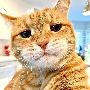

Citra dengan Kontras, Kecerahan, dan Ukuran Baru:


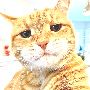

In [13]:
import cv2  # Import OpenCV
import numpy as np  # Import Numpy
from google.colab.patches import cv2_imshow  # Menggunakan cv2_imshow di Colab

# Load gambar dari drive atau path lokal
original = cv2.imread('/content/drive/MyDrive/kucing.jpg')

if original is None:
    print('Gambar tidak ditemukan, pastikan path benar!')
else:
    try:
        # Meminta input dari user untuk kontras (alpha) dan kecerahan (beta)
        alpha = float(input("Masukkan nilai kontras (misal: 1.0 - 3.0): "))  # Faktor kontras
        beta = int(input("Masukkan nilai kecerahan (misal: 0 - 100): "))  # Tingkat kecerahan

        # Meminta input ukuran gambar
        width = int(input("Masukkan lebar gambar yang diinginkan: "))
        height = int(input("Masukkan tinggi gambar yang diinginkan: "))
    except ValueError:
        print("Input salah, masukkan nilai numerik yang benar!")

    # Resize gambar sesuai ukuran yang diinginkan
    resized_image = cv2.resize(original, (width, height))

    # Terapkan transformasi kontras dan kecerahan
    contrast_image = cv2.convertScaleAbs(resized_image, alpha=alpha, beta=beta)

    # Tampilkan citra asli
    print("Citra Asli (Diubah ukurannya):")
    cv2_imshow(resized_image)

    # Tampilkan citra hasil transformasi kontras
    print("Citra dengan Kontras, Kecerahan, dan Ukuran Baru:")
    cv2_imshow(contrast_image)



Citra Asli:


<ipython-input-14-9fd1641de6f4>:18: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + gray_image)
<ipython-input-14-9fd1641de6f4>:21: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype=np.uint8)


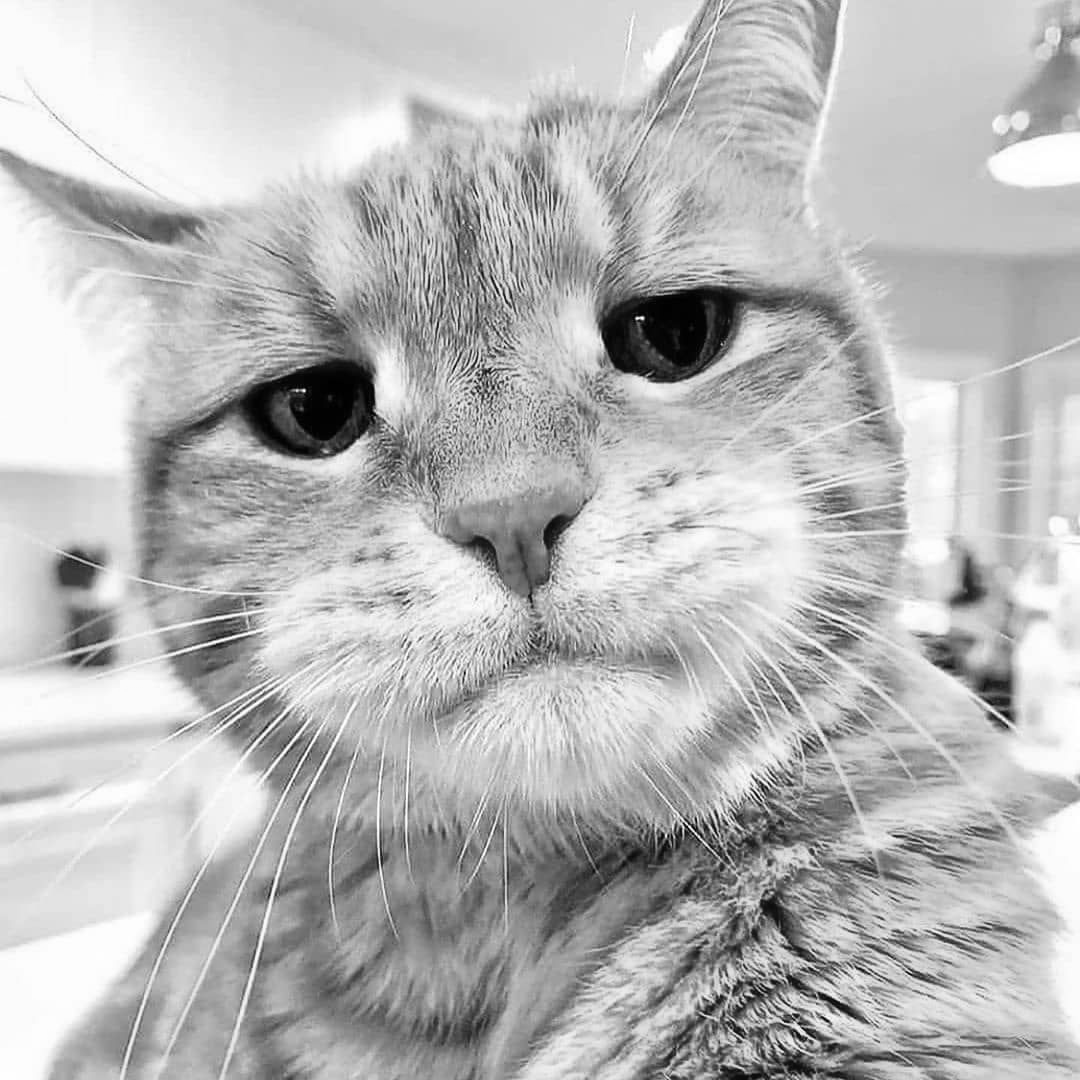

Citra Hasil Transformasi Logaritmik:


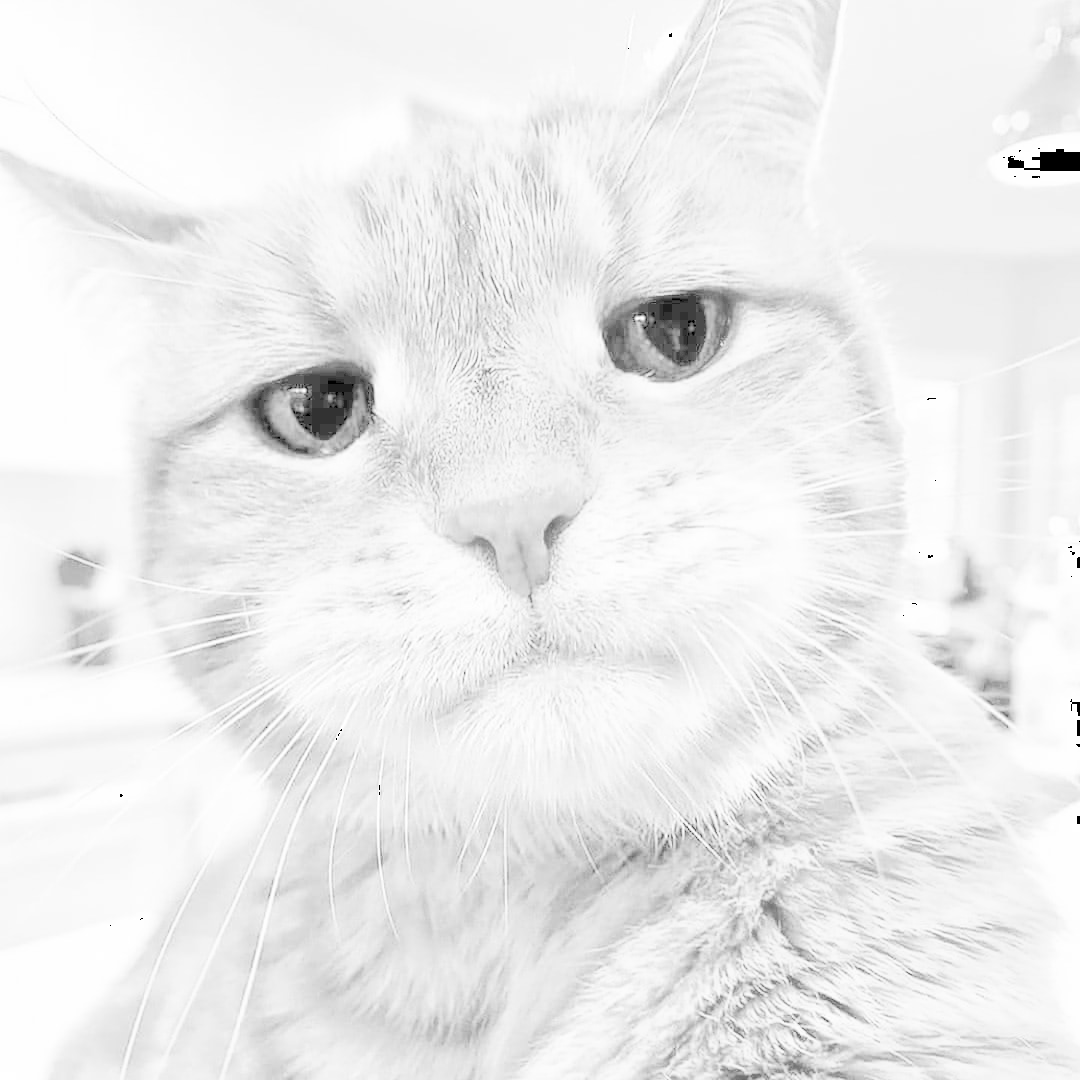

In [14]:
import cv2  # Import OpenCV
import numpy as np  # Import Numpy
from google.colab.patches import cv2_imshow  # Untuk menampilkan gambar di Colab

# Load gambar dari drive atau path lokal
original = cv2.imread('/content/drive/MyDrive/kucing.jpg')

if original is None:
    print('Gambar tidak ditemukan, pastikan path benar!')
else:
    # Mengkonversi gambar menjadi grayscale (karena transformasi log biasanya diterapkan pada gambar grayscale)
    gray_image = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

    # Mendefinisikan konstanta penskalaan c
    c = 255 / np.log(1 + np.max(gray_image))

    # Terapkan transformasi logaritmik
    log_transformed = c * np.log(1 + gray_image)

    # Konversi kembali ke tipe uint8 (8-bit)
    log_transformed = np.array(log_transformed, dtype=np.uint8)

    # Tampilkan gambar asli
    print("Citra Asli:")
    cv2_imshow(gray_image)

    # Tampilkan hasil transformasi logaritmik
    print("Citra Hasil Transformasi Logaritmik:")
    cv2_imshow(log_transformed)


Citra Asli:


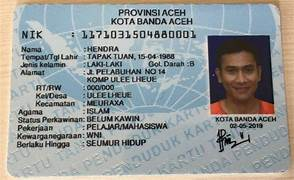

Citra Grayscale (Averaging):


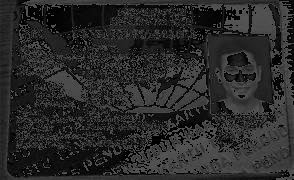

Citra Grayscale (Lightness):


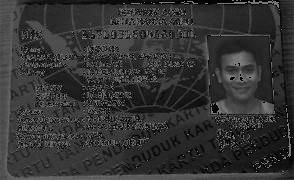

Citra Grayscale (Luminance):


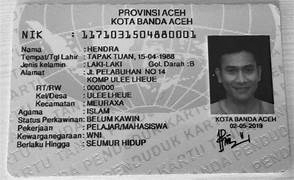

In [15]:
import cv2  # OpenCV untuk pengolahan citra
import numpy as np  # Numpy untuk operasi matriks
from google.colab.patches import cv2_imshow  # Untuk menampilkan gambar di Colab

# Load gambar dari drive atau path lokal
original = cv2.imread('/content/drive/MyDrive/ktp.jpeg')

if original is None:
    print('Gambar tidak ditemukan, pastikan path benar!')
else:
    # Pisahkan kanal warna B, G, R dari gambar asli
    B, G, R = cv2.split(original)

    # 1. Grayscale dengan metode Averaging
    grayscale_avg = (R + G + B) // 3  # Hitung rata-rata tiap piksel

    # 2. Grayscale dengan metode Lightness
    grayscale_lightness = (np.maximum(R, np.maximum(G, B)) + np.minimum(R, np.minimum(G, B))) // 2

    # 3. Grayscale dengan metode Luminance
    grayscale_luminance = 0.2989 * R + 0.5870 * G + 0.1140 * B
    grayscale_luminance = grayscale_luminance.astype(np.uint8)  # Konversi ke uint8

    # Tampilkan citra asli
    print("Citra Asli:")
    cv2_imshow(original)

    # Tampilkan citra grayscale hasil metode Averaging
    print("Citra Grayscale (Averaging):")
    cv2_imshow(grayscale_avg)

    # Tampilkan citra grayscale hasil metode Lightness
    print("Citra Grayscale (Lightness):")
    cv2_imshow(grayscale_lightness)

    # Tampilkan citra grayscale hasil metode Luminance
    print("Citra Grayscale (Luminance):")
    cv2_imshow(grayscale_luminance)


Citra Asli:


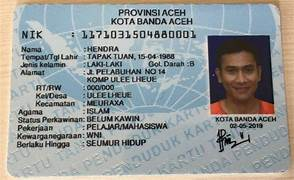

Citra dengan hanya warna biru dan bagian lain grayscale:


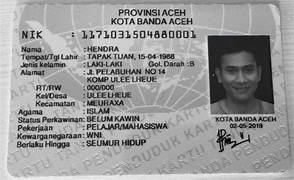

In [16]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load gambar dari drive atau path lokal
image = cv2.imread('/content/drive/MyDrive/ktp.jpeg')

if image is None:
    print('Gambar tidak ditemukan, pastikan path benar!')
else:
    # Konversi citra ke ruang warna HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Definisikan rentang warna biru dalam HSV
    lower_blue = np.array([100, 150, 50])
    upper_blue = np.array([140, 255, 255])

    # Membuat mask untuk warna biru
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Membuat citra berwarna biru (menggunakan mask untuk mempertahankan biru)
    blue_only = cv2.bitwise_and(image, image, mask=mask)

    # Membuat citra grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Konversi grayscale kembali ke format 3 kanal untuk kombinasi
    gray_3_channel = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

    # Menggabungkan citra grayscale dengan warna biru
    result = np.where(blue_only != 0, image, gray_3_channel)

    # Tampilkan citra asli
    print("Citra Asli:")
    cv2_imshow(image)

    # Tampilkan hasil citra dengan hanya warna biru
    print("Citra dengan hanya warna biru dan bagian lain grayscale:")
    cv2_imshow(result)
